In [79]:
import numpy as np 
import pandas as pd
from scipy import stats
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns

In [80]:
data = pd.read_csv("/kaggle/input/aps-failure-at-scania-trucks-data-set/aps_failure_training_set.csv")

In [81]:
data

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,neg,153002,na,664,186,0,0,0,0,0,...,998500,566884,1290398,1218244,1019768,717762,898642,28588,0,0
59996,neg,2286,na,2130706538,224,0,0,0,0,0,...,10578,6760,21126,68424,136,0,0,0,0,0
59997,neg,112,0,2130706432,18,0,0,0,0,0,...,792,386,452,144,146,2622,0,0,0,0
59998,neg,80292,na,2130706432,494,0,0,0,0,0,...,699352,222654,347378,225724,194440,165070,802280,388422,0,0


In [82]:
missing_values =data.isna().sum()

In [83]:
missing_values

class     0
aa_000    0
ab_000    0
ac_000    0
ad_000    0
         ..
ee_007    0
ee_008    0
ee_009    0
ef_000    0
eg_000    0
Length: 171, dtype: int64

From here we will start cleaning the data , as above we noticed that "na" was missing value but was not represented by np.nan

In [84]:
columns_missing_values = dict()

for single_column in data.columns:
    
    num_missing_values = data[(data[single_column] == "na") | (data[single_column] == "Na") | (data[single_column] == "NA")| (data[single_column] == "?") | (data[single_column] == None)].shape[0]
    columns_missing_values[single_column] = num_missing_values

In [85]:
columns_missing_values = pd.Series(columns_missing_values)

In [86]:
columns_missing_values

class         0
aa_000        0
ab_000    46329
ac_000     3335
ad_000    14861
          ...  
ee_007      671
ee_008      671
ee_009      671
ef_000     2724
eg_000     2723
Length: 171, dtype: int64

In [87]:
data_copy = data.copy()

In [88]:
data_copy

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,neg,153002,na,664,186,0,0,0,0,0,...,998500,566884,1290398,1218244,1019768,717762,898642,28588,0,0
59996,neg,2286,na,2130706538,224,0,0,0,0,0,...,10578,6760,21126,68424,136,0,0,0,0,0
59997,neg,112,0,2130706432,18,0,0,0,0,0,...,792,386,452,144,146,2622,0,0,0,0
59998,neg,80292,na,2130706432,494,0,0,0,0,0,...,699352,222654,347378,225724,194440,165070,802280,388422,0,0


In [89]:
for columns in data_copy.columns:

    data_copy[columns].replace(to_replace = ["na","Na","NA","?",None] , value = [np.nan]*5,inplace = True)

In [90]:
data_copy

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,NaN,0,NaN,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,NaN,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,NaN,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,neg,153002,NaN,664,186,0,0,0,0,0,...,998500,566884,1290398,1218244,1019768,717762,898642,28588,0,0
59996,neg,2286,NaN,2130706538,224,0,0,0,0,0,...,10578,6760,21126,68424,136,0,0,0,0,0
59997,neg,112,0,2130706432,18,0,0,0,0,0,...,792,386,452,144,146,2622,0,0,0,0
59998,neg,80292,NaN,2130706432,494,0,0,0,0,0,...,699352,222654,347378,225724,194440,165070,802280,388422,0,0


Before dealing with missing values let us check for duplicate rows first

In [91]:
data_copy.duplicated().sum()

0

Now we will chwck if any column contains more than 50% of the missing values.

In [92]:
missing_values = data_copy.isna().mean()

In [93]:
majority_missing_col = missing_values[missing_values >= 0.5]

In [94]:
print(majority_missing_col)

ab_000    0.772150
bm_000    0.659150
bn_000    0.733483
bo_000    0.772217
bp_000    0.795667
bq_000    0.812033
br_000    0.821067
cr_000    0.772150
dtype: float64


In [95]:
data_copy.drop(columns=majority_missing_col.index,inplace=True)

In [96]:
data_copy

,class,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,2130706438,280,0,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,0,NaN,0,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,228,100,0,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,70,66,0,10,0,0,0,318,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,1368,458,0,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,neg,153002,664,186,0,0,0,0,0,2564,...,998500,566884,1290398,1218244,1019768,717762,898642,28588,0,0
59996,neg,2286,2130706538,224,0,0,0,0,0,0,...,10578,6760,21126,68424,136,0,0,0,0,0
59997,neg,112,2130706432,18,0,0,0,0,0,0,...,792,386,452,144,146,2622,0,0,0,0
59998,neg,80292,2130706432,494,0,0,0,0,0,0,...,699352,222654,347378,225724,194440,165070,802280,388422,0,0


Now as we dropped columns with more than 50% of missing values ,we will fill the missing values in remaining columns.

In [97]:
data_copy.dtypes

class     object
aa_000     int64
ac_000    object
ad_000    object
ae_000    object
           ...  
ee_007    object
ee_008    object
ee_009    object
ef_000    object
eg_000    object
Length: 163, dtype: object

In [98]:
data_copy.select_dtypes(include='int')

,aa_000
0,76698
1,33058
2,41040
3,12
4,60874
...,...
59995,153002
59996,2286
59997,112
59998,80292


In [99]:
data_copy.select_dtypes(include='string')

""
0
1
2
3
4
...
59995
59996
59997
59998


In [100]:
data_copy.infer_objects().dtypes

class     object
aa_000     int64
ac_000    object
ad_000    object
ae_000    object
           ...  
ee_007    object
ee_008    object
ee_009    object
ef_000    object
eg_000    object
Length: 163, dtype: object

First we will find columns with least missing values.

In [101]:
minimum_missing_col = missing_values[missing_values <= 0.5]

In [102]:
minimum_missing_col

class     0.000000
aa_000    0.000000
ac_000    0.055583
ad_000    0.247683
ae_000    0.041667
            ...   
ee_007    0.011183
ee_008    0.011183
ee_009    0.011183
ef_000    0.045400
eg_000    0.045383
Length: 163, dtype: float64

In [103]:
data_copy["ac_000"].isna().sum()

3335

In [104]:
data_copy["ac_000"].value_counts()

ac_000
0             8752
2130706432    6188
2130706434    1227
4              768
8              762
              ... 
4486             1
2132             1
3396             1
4202             1
2602             1
Name: count, Length: 2061, dtype: int64

In [105]:
data_copy["ac_000"].fillna(value = data_copy["ac_000"].value_counts().iloc[0],inplace = True)

In [106]:
data_copy["ac_000"].isna().sum()

0

In [107]:
for i in data_copy.columns:

    if data_copy[i].isna().sum() >= 0:

        data_copy[i].fillna(value = data_copy[i].value_counts().iloc[0],inplace = True)

In [108]:
data_copy.isna().sum()

class     0
aa_000    0
ac_000    0
ad_000    0
ae_000    0
         ..
ee_007    0
ee_008    0
ee_009    0
ef_000    0
eg_000    0
Length: 163, dtype: int64

In [109]:
data_copy2 = data_copy.iloc[:,1:-1].astype("float64")

In [110]:
data_copy2

,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,...,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000
0,76698.0,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,37250.0,...,1706908.0,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0
1,33058.0,0.000000e+00,2009.0,0.0,0.0,0.0,0.0,0.0,0.0,18254.0,...,824154.0,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0
2,41040.0,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,1648.0,...,453378.0,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0
3,12.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,318.0,2212.0,...,1566.0,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0
4,60874.0,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,0.0,43752.0,...,904230.0,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,153002.0,6.640000e+02,186.0,0.0,0.0,0.0,0.0,0.0,2564.0,59100.0,...,1479066.0,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0
59996,2286.0,2.130707e+09,224.0,0.0,0.0,0.0,0.0,0.0,0.0,104.0,...,15024.0,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0
59997,112.0,2.130706e+09,18.0,0.0,0.0,0.0,0.0,0.0,0.0,28.0,...,2740.0,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0
59998,80292.0,2.130706e+09,494.0,0.0,0.0,0.0,0.0,0.0,0.0,330.0,...,1709450.0,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0


In [111]:
data_copy["class"].isna().sum()

0

Concatinate both dataframes

In [112]:
for i in data_copy.columns:

    if i not in data_copy2.columns:

        print(i)

class
eg_000


In [113]:
data_copy["eg_000"].isna().sum()

0

In [114]:
data_copy["eg_000"].dtype

dtype('O')

In [115]:
data_copy["eg_000"].unique()

array(['0', '32', 56794, '164', '54', '4', '2', '10', '6', '14', '12',
       '8', '144', '68', '86', '26', '20', '28', '16', '34', '94', '222',
       '36', '892', '48', '72', '152', '78', '910', '70', '172', '46',
       '80', '182', '24', '56', '102', '430', '42', '18', '162', '40',
       '200', '1146', '44', '108', '92', '22', '606', '416'], dtype=object)

In [116]:
data_copy["eg_000"] = data_copy["eg_000"].astype("float64")

In [117]:
data_copy["eg_000"].dtype

dtype('float64')

In [118]:
df_selected = data_copy[["class","eg_000"]]

In [119]:
df_selected

,class,eg_000
0,neg,0.0
1,neg,0.0
2,neg,0.0
3,neg,32.0
4,neg,0.0
...,...,...
59995,neg,0.0
59996,neg,0.0
59997,neg,0.0
59998,neg,0.0


In [120]:
df = pd.concat([df_selected,data_copy2],axis = 1)

In [121]:
df

,class,eg_000,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000
0,neg,0.0,76698.0,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1706908.0,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0
1,neg,0.0,33058.0,0.000000e+00,2009.0,0.0,0.0,0.0,0.0,0.0,...,824154.0,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0
2,neg,0.0,41040.0,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,453378.0,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0
3,neg,32.0,12.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,1566.0,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0
4,neg,0.0,60874.0,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,904230.0,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,neg,0.0,153002.0,6.640000e+02,186.0,0.0,0.0,0.0,0.0,0.0,...,1479066.0,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0
59996,neg,0.0,2286.0,2.130707e+09,224.0,0.0,0.0,0.0,0.0,0.0,...,15024.0,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0
59997,neg,0.0,112.0,2.130706e+09,18.0,0.0,0.0,0.0,0.0,0.0,...,2740.0,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0
59998,neg,0.0,80292.0,2.130706e+09,494.0,0.0,0.0,0.0,0.0,0.0,...,1709450.0,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0


In [122]:
data_copy["class"].unique()

array(['neg', 'pos'], dtype=object)

In [123]:
df["class"] = df["class"].map({'neg': 0.0, 'pos': 1.0})

In [124]:
df["class"]

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
59995    0.0
59996    0.0
59997    0.0
59998    0.0
59999    0.0
Name: class, Length: 60000, dtype: float64

In [125]:
df

,class,eg_000,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000
0,0.0,0.0,76698.0,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1706908.0,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0
1,0.0,0.0,33058.0,0.000000e+00,2009.0,0.0,0.0,0.0,0.0,0.0,...,824154.0,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0
2,0.0,0.0,41040.0,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,453378.0,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0
3,0.0,32.0,12.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,1566.0,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0
4,0.0,0.0,60874.0,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,904230.0,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.0,153002.0,6.640000e+02,186.0,0.0,0.0,0.0,0.0,0.0,...,1479066.0,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0
59996,0.0,0.0,2286.0,2.130707e+09,224.0,0.0,0.0,0.0,0.0,0.0,...,15024.0,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0
59997,0.0,0.0,112.0,2.130706e+09,18.0,0.0,0.0,0.0,0.0,0.0,...,2740.0,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0
59998,0.0,0.0,80292.0,2.130706e+09,494.0,0.0,0.0,0.0,0.0,0.0,...,1709450.0,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0


Now we will detect and handel outliers

In [126]:
z_score = (df.iloc[:,1:] - df.iloc[:,1:].mean())/df.iloc[:,1:].std()

In [127]:
z_score

,eg_000,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000
0,-0.218055,0.119380,2.310205,-0.004098,-0.209106,-0.209470,-0.041365,-0.046897,-0.061098,-0.116341,...,0.364403,0.695644,0.526336,0.241055,0.071913,0.009187,-0.107365,-0.143452,-0.183027,-0.218086
1,-0.218055,-0.180695,-0.432856,-0.004049,-0.209106,-0.209470,-0.041365,-0.046897,-0.061098,-0.116341,...,0.019176,-0.016628,-0.056811,-0.126829,-0.129228,-0.184004,-0.152058,-0.088994,-0.151293,-0.218086
2,-0.218055,-0.125810,-0.432856,-0.004103,-0.209106,-0.209470,-0.041365,-0.046897,-0.061098,-0.116341,...,-0.125827,-0.141864,-0.090566,-0.014430,0.017922,-0.008120,-0.107326,-0.094469,-0.172153,-0.218086
3,-0.215348,-0.407925,-0.432856,-0.004104,-0.209106,-0.208568,-0.041365,-0.046897,-0.061098,-0.115921,...,-0.302522,-0.382852,-0.386034,-0.379041,-0.349191,-0.309641,-0.199267,-0.307201,-0.183027,-0.217750
4,-0.218055,0.010572,-0.432854,-0.004093,-0.209106,-0.209470,-0.041365,-0.046897,-0.061098,-0.116341,...,0.050492,0.157815,0.038850,-0.030508,-0.037995,-0.039888,-0.017994,0.663240,-0.157259,-0.218086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,-0.218055,0.644059,-0.432855,-0.004101,-0.209106,-0.209470,-0.041365,-0.046897,-0.061098,-0.112956,...,0.275298,0.485194,0.662266,0.730737,0.742859,0.649025,0.218344,1.702411,0.421771,-0.218086
59996,-0.218055,-0.392288,2.310205,-0.004100,-0.209106,-0.209470,-0.041365,-0.046897,-0.061098,-0.116341,...,-0.297259,-0.373862,-0.373617,-0.360922,-0.287892,-0.309523,-0.199267,-0.307201,-0.183027,-0.218086
59997,-0.218055,-0.407237,2.310205,-0.004106,-0.209106,-0.209470,-0.041365,-0.046897,-0.061098,-0.116341,...,-0.302063,-0.382372,-0.385405,-0.378703,-0.349101,-0.309513,-0.197742,-0.307201,-0.183027,-0.218086
59998,-0.218055,0.144093,2.310205,-0.004092,-0.209106,-0.209470,-0.041365,-0.046897,-0.061098,-0.116341,...,0.365397,0.225067,0.025653,-0.080323,-0.146881,-0.126859,-0.103226,1.486919,8.034285,-0.218086


In [128]:
for single_column in z_score.columns:

    outlier_row_idx = z_score[(z_score[single_column] <= -1.96) | (z_score[single_column] >= 1.96)].index
    df.loc[outlier_row_idx,single_column] = df[single_column].mean()

In [129]:
df

,class,eg_000,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000
0,0.0,0.0,76698.0,3.362263e+08,280.0,0.0,0.0,0.0,0.0,0.0,...,1706908.0,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.00000,0.0
1,0.0,0.0,33058.0,0.000000e+00,2009.0,0.0,0.0,0.0,0.0,0.0,...,824154.0,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.00000,0.0
2,0.0,0.0,41040.0,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,453378.0,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.00000,0.0
3,0.0,32.0,12.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,1566.0,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.00000,4.0
4,0.0,0.0,60874.0,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,904230.0,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.00000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.0,153002.0,6.640000e+02,186.0,0.0,0.0,0.0,0.0,0.0,...,1479066.0,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.00000,0.0
59996,0.0,0.0,2286.0,3.362263e+08,224.0,0.0,0.0,0.0,0.0,0.0,...,15024.0,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.00000,0.0
59997,0.0,0.0,112.0,3.362263e+08,18.0,0.0,0.0,0.0,0.0,0.0,...,2740.0,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.00000,0.0
59998,0.0,0.0,80292.0,3.362263e+08,494.0,0.0,0.0,0.0,0.0,0.0,...,1709450.0,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,8651.43315,0.0


Now we will Normalize and Standarize our Df.

In [130]:
df_min = df.min()
df_max = df.max()

In [131]:
df_range = df_max - df_min

In [132]:
df_range[df_range == 0] = 1

In [133]:
df[:] = (df - df_min) / df_range

In [134]:
df

,class,eg_000,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000
0,0.0,0.000000,0.223093,1.000000e+00,0.000457,0.0,0.000000,0.0,0.0,0.0,...,0.294967,0.461174,0.389169,0.265230,0.182642,0.140647,0.042602,0.072247,0.000000,0.000000
1,0.0,0.000000,0.096156,0.000000e+00,0.003281,0.0,0.000000,0.0,0.0,0.0,...,0.142420,0.156659,0.140453,0.107890,0.095411,0.055426,0.021884,0.096274,0.014812,0.000000
2,0.0,0.000000,0.119374,6.781147e-07,0.000163,0.0,0.000000,0.0,0.0,0.0,...,0.078347,0.103118,0.126056,0.155962,0.159227,0.133013,0.042620,0.093859,0.005076,0.000000
3,0.0,0.012414,0.000035,2.081931e-07,0.000108,0.0,0.000498,0.0,0.0,0.0,...,0.000271,0.000089,0.000036,0.000021,0.000017,0.000004,0.000000,0.000000,0.000000,0.001545
4,0.0,0.000000,0.177065,4.068688e-06,0.000748,0.0,0.000000,0.0,0.0,0.0,...,0.156258,0.231238,0.181253,0.149086,0.134977,0.118999,0.084031,0.428164,0.012027,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.000000,0.445040,1.974860e-06,0.000304,0.0,0.000000,0.0,0.0,0.0,...,0.255594,0.371201,0.447144,0.474663,0.473618,0.422896,0.193588,0.886651,0.282300,0.000000
59996,0.0,0.000000,0.006649,1.000000e+00,0.000366,0.0,0.000000,0.0,0.0,0.0,...,0.002596,0.003932,0.005332,0.007771,0.026601,0.000056,0.000000,0.000000,0.000000,0.000000
59997,0.0,0.000000,0.000326,1.000000e+00,0.000029,0.0,0.000000,0.0,0.0,0.0,...,0.000473,0.000294,0.000304,0.000166,0.000056,0.000061,0.000707,0.000000,0.000000,0.000000
59998,0.0,0.000000,0.233547,1.000000e+00,0.000807,0.0,0.000000,0.0,0.0,0.0,...,0.295407,0.259990,0.175624,0.127780,0.087755,0.080634,0.044521,0.791575,0.085431,0.000000


In [135]:
df_mean = df.mean()
df_std = df.std()

In [136]:
df_std[df_std == 0] = 1

In [137]:
df[:] = (df - df_mean) / df_std

In [138]:
df

,class,eg_000,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000
0,-0.130188,-0.218405,0.789623,2.310205,-0.181646,-0.211247,-0.212300,-0.049756,-0.11935,-0.140056,...,1.611570,2.342509,1.805497,0.975364,0.516255,0.428129,-0.011756,-0.132524,-0.386312,-0.218240
1,-0.130188,-0.218405,-0.087904,-0.432863,0.383781,-0.211247,-0.212300,-0.049756,-0.11935,-0.140056,...,0.430583,0.300280,0.166014,-0.046603,-0.084120,-0.208030,-0.215263,0.012922,-0.269201,-0.218240
2,-0.130188,-0.218405,0.072600,-0.432861,-0.240511,-0.211247,-0.212300,-0.049756,-0.11935,-0.140056,...,-0.065457,-0.058796,0.071114,0.265636,0.355099,0.371138,-0.011581,-0.001699,-0.346182,-0.218240
3,-0.130188,-0.158766,-0.752404,-0.432862,-0.251630,-0.211247,-0.192514,-0.049756,-0.11935,-0.140056,...,-0.669911,-0.749756,-0.759577,-0.747242,-0.740675,-0.621743,-0.430225,-0.569865,-0.386312,-0.210818
4,-0.130188,-0.218405,0.471429,-0.432852,-0.123436,-0.211247,-0.212300,-0.049756,-0.11935,-0.140056,...,0.537712,0.800445,0.434960,0.220972,0.188197,0.266530,0.395183,2.021989,-0.291218,-0.218240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,-0.130188,-0.218405,2.323969,-0.432857,-0.212387,-0.211247,-0.212300,-0.049756,-0.11935,-0.140056,...,1.306753,1.739105,2.187655,2.335685,2.518927,2.535055,1.471323,4.797406,1.845677,-0.218240
59996,-0.130188,-0.218405,-0.706678,2.310205,-0.199960,-0.211247,-0.212300,-0.049756,-0.11935,-0.140056,...,-0.651906,-0.723982,-0.724668,-0.696906,-0.557707,-0.621353,-0.430225,-0.569865,-0.386312,-0.218240
59997,-0.130188,-0.218405,-0.750393,2.310205,-0.267327,-0.211247,-0.212300,-0.049756,-0.11935,-0.140056,...,-0.668340,-0.748380,-0.757809,-0.746301,-0.740407,-0.621322,-0.423278,-0.569865,-0.386312,-0.218240
59998,-0.130188,-0.218405,0.861892,2.310205,-0.111663,-0.211247,-0.212300,-0.049756,-0.11935,-0.140056,...,1.614971,0.993269,0.397857,0.082587,-0.136811,-0.019859,0.007091,4.221870,0.289143,-0.218240


In [139]:
df.describe().round(3)

,class,eg_000,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000
count,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.00,60000.000,60000.000,...,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000,60000.000
mean,0.000,-0.000,0.000,0.000,0.000,-0.000,0.000,0.00,0.000,0.000,...,-0.000,0.000,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,-0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.00,1.000,1.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-0.130,-0.218,-0.753,-0.433,-0.273,-0.211,-0.212,-0.05,-0.119,-0.140,...,-0.672,-0.750,-0.760,-0.747,-0.741,-0.622,-0.430,-0.570,-0.386,-0.218
25%,-0.130,-0.218,-0.736,-0.433,-0.259,-0.211,-0.212,-0.05,-0.119,-0.140,...,-0.661,-0.744,-0.754,-0.742,-0.733,-0.620,-0.430,-0.570,-0.386,-0.218
50%,-0.130,-0.218,-0.134,-0.433,-0.179,-0.211,-0.212,-0.05,-0.119,-0.140,...,-0.219,-0.182,-0.194,-0.233,-0.249,-0.359,-0.328,-0.543,-0.386,-0.218
75%,-0.130,-0.218,0.226,-0.433,0.384,-0.211,-0.212,-0.05,-0.119,-0.140,...,0.210,0.334,0.326,0.306,0.302,0.222,0.010,0.247,-0.202,-0.218
max,7.681,4.586,6.160,2.310,199.954,42.862,39.497,73.21,10.463,20.201,...,7.070,5.956,5.832,5.748,6.142,6.843,9.392,5.484,7.520,4.585


In [140]:
df.select_dtypes(include='object')

""
0
1
2
3
4
...
59995
59996
59997
59998


we already kniow we didn't have categorial data still for the reassurance we checked, now we will perform data aggregations. We are not going to do data aggregations like grouping here as it is for categorial dtypes and also will not make pivot table. We will make a correlation heatmap.

In [141]:
df.corr()

,class,eg_000,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000
class,1.000000,0.207615,0.151761,-0.050991,0.053792,0.186863,0.185644,0.106549,0.087387,0.221600,...,0.197892,0.146375,0.135724,0.132868,0.133867,0.147967,0.231956,0.019244,0.007268,0.207481
eg_000,0.207615,1.000000,0.242392,-0.094125,0.089075,0.904574,0.873440,0.069538,0.163713,0.173395,...,0.230373,0.213534,0.206621,0.204577,0.218162,0.193585,0.201526,0.048749,0.029165,0.999683
aa_000,0.151761,0.242392,1.000000,-0.000992,0.116722,0.255244,0.258306,0.029360,0.012806,0.119917,...,0.635664,0.737880,0.743408,0.712588,0.709913,0.677003,0.494414,0.389212,0.231335,0.242198
ac_000,-0.050991,-0.094125,-0.000992,1.000000,-0.033423,-0.086798,-0.086493,-0.010056,-0.046454,-0.050721,...,-0.007868,0.010269,0.016462,0.011118,0.007464,0.001775,-0.023428,0.047310,0.030685,-0.094434
ad_000,0.053792,0.089075,0.116722,-0.033423,1.000000,0.079829,0.077032,0.030814,0.018622,0.030513,...,0.134049,0.119132,0.094367,0.079384,0.071202,0.056347,0.051698,0.044166,0.027185,0.089102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ee_006,0.147967,0.193585,0.677003,0.001775,0.056347,0.198182,0.205674,0.015736,-0.042218,0.100344,...,0.537882,0.597415,0.609165,0.589598,0.677559,1.000000,0.520016,0.386854,0.188314,0.193457
ee_007,0.231956,0.201526,0.494414,-0.023428,0.051698,0.202812,0.204276,0.031297,-0.015985,0.116839,...,0.379803,0.390239,0.381447,0.360322,0.378180,0.520016,1.000000,0.239071,0.134036,0.201331
ee_008,0.019244,0.048749,0.389212,0.047310,0.044166,0.043804,0.039016,0.006709,-0.043597,-0.012931,...,0.328581,0.381735,0.381898,0.345792,0.367120,0.386854,0.239071,1.000000,0.607704,0.048647
ee_009,0.007268,0.029165,0.231335,0.030685,0.027185,0.028910,0.025067,0.040545,0.207411,0.057058,...,0.168602,0.195314,0.193304,0.164705,0.171919,0.188314,0.134036,0.607704,1.000000,0.029228


Filter the columns whose corr is higher.

In [142]:
corr_matrix = df.corr()

In [143]:
corr_matrix

,class,eg_000,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000
class,1.000000,0.207615,0.151761,-0.050991,0.053792,0.186863,0.185644,0.106549,0.087387,0.221600,...,0.197892,0.146375,0.135724,0.132868,0.133867,0.147967,0.231956,0.019244,0.007268,0.207481
eg_000,0.207615,1.000000,0.242392,-0.094125,0.089075,0.904574,0.873440,0.069538,0.163713,0.173395,...,0.230373,0.213534,0.206621,0.204577,0.218162,0.193585,0.201526,0.048749,0.029165,0.999683
aa_000,0.151761,0.242392,1.000000,-0.000992,0.116722,0.255244,0.258306,0.029360,0.012806,0.119917,...,0.635664,0.737880,0.743408,0.712588,0.709913,0.677003,0.494414,0.389212,0.231335,0.242198
ac_000,-0.050991,-0.094125,-0.000992,1.000000,-0.033423,-0.086798,-0.086493,-0.010056,-0.046454,-0.050721,...,-0.007868,0.010269,0.016462,0.011118,0.007464,0.001775,-0.023428,0.047310,0.030685,-0.094434
ad_000,0.053792,0.089075,0.116722,-0.033423,1.000000,0.079829,0.077032,0.030814,0.018622,0.030513,...,0.134049,0.119132,0.094367,0.079384,0.071202,0.056347,0.051698,0.044166,0.027185,0.089102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ee_006,0.147967,0.193585,0.677003,0.001775,0.056347,0.198182,0.205674,0.015736,-0.042218,0.100344,...,0.537882,0.597415,0.609165,0.589598,0.677559,1.000000,0.520016,0.386854,0.188314,0.193457
ee_007,0.231956,0.201526,0.494414,-0.023428,0.051698,0.202812,0.204276,0.031297,-0.015985,0.116839,...,0.379803,0.390239,0.381447,0.360322,0.378180,0.520016,1.000000,0.239071,0.134036,0.201331
ee_008,0.019244,0.048749,0.389212,0.047310,0.044166,0.043804,0.039016,0.006709,-0.043597,-0.012931,...,0.328581,0.381735,0.381898,0.345792,0.367120,0.386854,0.239071,1.000000,0.607704,0.048647
ee_009,0.007268,0.029165,0.231335,0.030685,0.027185,0.028910,0.025067,0.040545,0.207411,0.057058,...,0.168602,0.195314,0.193304,0.164705,0.171919,0.188314,0.134036,0.607704,1.000000,0.029228


In [144]:
high_corr_columns = corr_matrix[(corr_matrix['class'] >= 0.25) | (corr_matrix['class'] <= -0.25)].index

In [145]:
high_corr_columns

Index(['class', 'az_000', 'az_001', 'az_002', 'be_000', 'cs_002'], dtype='object')

In [146]:
filtered_data= df[high_corr_columns]

In [147]:
filtered_data

,class,az_000,az_001,az_002,be_000,cs_002
0,-0.130188,0.029419,-0.073893,-0.050299,-0.411040,0.574273
1,-0.130188,0.192776,0.790983,0.576938,-0.293250,0.198939
2,-0.130188,-0.283140,-0.218343,-0.237652,-0.195705,-0.195900
3,-0.130188,-0.412694,-0.392836,-0.316982,-0.460733,-0.400922
4,-0.130188,-0.281142,-0.338819,-0.280887,-0.165337,-0.106421
...,...,...,...,...,...,...
59995,-0.130188,0.216422,0.132767,-0.024851,0.278216,0.101323
59996,-0.130188,-0.314946,-0.389497,-0.315553,-0.131289,-0.387887
59997,-0.130188,-0.352913,-0.314238,-0.257906,-0.459813,-0.400747
59998,-0.130188,0.041409,0.227144,-0.023033,-0.265643,0.814180


In [148]:
filtered_data["class"] = data["class"]

/tmp/ipykernel_42/4285084361.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["class"] = data["class"]


In [150]:
filtered_data

,class,az_000,az_001,az_002,be_000,cs_002
0,neg,0.029419,-0.073893,-0.050299,-0.411040,0.574273
1,neg,0.192776,0.790983,0.576938,-0.293250,0.198939
2,neg,-0.283140,-0.218343,-0.237652,-0.195705,-0.195900
3,neg,-0.412694,-0.392836,-0.316982,-0.460733,-0.400922
4,neg,-0.281142,-0.338819,-0.280887,-0.165337,-0.106421
...,...,...,...,...,...,...
59995,neg,0.216422,0.132767,-0.024851,0.278216,0.101323
59996,neg,-0.314946,-0.389497,-0.315553,-0.131289,-0.387887
59997,neg,-0.352913,-0.314238,-0.257906,-0.459813,-0.400747
59998,neg,0.041409,0.227144,-0.023033,-0.265643,0.814180


In [151]:
filtered_data["class"].replace(to_replace=['neg','pos'],value=[0.0,1.0],inplace= True)

/tmp/ipykernel_42/3458064681.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["class"].replace(to_replace=['neg','pos'],value=[0.0,1.0],inplace= True)


In [152]:
filtered_data

,class,az_000,az_001,az_002,be_000,cs_002
0,0.0,0.029419,-0.073893,-0.050299,-0.411040,0.574273
1,0.0,0.192776,0.790983,0.576938,-0.293250,0.198939
2,0.0,-0.283140,-0.218343,-0.237652,-0.195705,-0.195900
3,0.0,-0.412694,-0.392836,-0.316982,-0.460733,-0.400922
4,0.0,-0.281142,-0.338819,-0.280887,-0.165337,-0.106421
...,...,...,...,...,...,...
59995,0.0,0.216422,0.132767,-0.024851,0.278216,0.101323
59996,0.0,-0.314946,-0.389497,-0.315553,-0.131289,-0.387887
59997,0.0,-0.352913,-0.314238,-0.257906,-0.459813,-0.400747
59998,0.0,0.041409,0.227144,-0.023033,-0.265643,0.814180


We will apply a bit of feature engineering to get more string features.

In [153]:
y = filtered_data['class']
x = filtered_data.iloc[:,1:]

In [154]:
quadratic_transform = PolynomialFeatures(degree=2,include_bias=False)

In [156]:
X_quadratic = quadratic_transform.fit_transform(x)

In [157]:
X_quadratic

array([[ 0.02941941, -0.07389343, -0.05029886, ...,  0.16895417,
        -0.23604949,  0.32978981],
       [ 0.19277641,  0.7909831 ,  0.57693782, ...,  0.08599569,
        -0.05833904,  0.03957691],
       [-0.28314032, -0.21834298, -0.2376519 , ...,  0.03830055,
         0.0383387 ,  0.03837688],
       ...,
       [-0.35291258, -0.31423806, -0.25790628, ...,  0.21142783,
         0.18426883,  0.16059855],
       [ 0.04140891,  0.2271443 , -0.02303335, ...,  0.07056629,
        -0.21628137,  0.66288922],
       [-0.14342929, -0.06569986, -0.08016109, ...,  0.17275788,
         0.04381247,  0.01111111]])

In [158]:
X_quadratic.shape

(60000, 20)

In [160]:
x = pd.DataFrame(X_quadratic,columns=["feature_"+str(i) for i in range(1,X_quadratic.shape[1]+1)])

In [161]:
x

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20
0,0.029419,-0.073893,-0.050299,-0.411040,0.574273,0.000866,-0.002174,-0.001480,-0.012093,0.016895,0.005460,0.003717,0.030373,-0.042435,0.002530,0.020675,-0.028885,0.168954,-0.236049,0.329790
1,0.192776,0.790983,0.576938,-0.293250,0.198939,0.037163,0.152483,0.111220,-0.056532,0.038351,0.625654,0.456348,-0.231956,0.157358,0.332857,-0.169187,0.114776,0.085996,-0.058339,0.039577
2,-0.283140,-0.218343,-0.237652,-0.195705,-0.195900,0.080168,0.061822,0.067289,0.055412,0.055467,0.047674,0.051890,0.042731,0.042773,0.056478,0.046510,0.046556,0.038301,0.038339,0.038377
3,-0.412694,-0.392836,-0.316982,-0.460733,-0.400922,0.170316,0.162121,0.130816,0.190142,0.165458,0.154320,0.124522,0.180992,0.157497,0.100477,0.146044,0.127085,0.212275,0.184718,0.160739
4,-0.281142,-0.338819,-0.280887,-0.165337,-0.106421,0.079041,0.095256,0.078969,0.046483,0.029919,0.114798,0.095170,0.056019,0.036057,0.078898,0.046441,0.029892,0.027336,0.017595,0.011325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.216422,0.132767,-0.024851,0.278216,0.101323,0.046839,0.028734,-0.005378,0.060212,0.021929,0.017627,-0.003299,0.036938,0.013452,0.000618,-0.006914,-0.002518,0.077404,0.028190,0.010266
59996,-0.314946,-0.389497,-0.315553,-0.131289,-0.387887,0.099191,0.122671,0.099382,0.041349,0.122163,0.151708,0.122907,0.051137,0.151081,0.099574,0.041429,0.122399,0.017237,0.050925,0.150456
59997,-0.352913,-0.314238,-0.257906,-0.459813,-0.400747,0.124547,0.110899,0.091018,0.162274,0.141429,0.098746,0.081044,0.144491,0.125930,0.066516,0.118589,0.103355,0.211428,0.184269,0.160599
59998,0.041409,0.227144,-0.023033,-0.265643,0.814180,0.001715,0.009406,-0.000954,-0.011000,0.033714,0.051595,-0.005232,-0.060339,0.184936,0.000531,0.006119,-0.018753,0.070566,-0.216281,0.662889


In [162]:
df = pd.concat([x,y],axis = 1)

In [163]:
df

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,class
0,0.029419,-0.073893,-0.050299,-0.411040,0.574273,0.000866,-0.002174,-0.001480,-0.012093,0.016895,...,0.003717,0.030373,-0.042435,0.002530,0.020675,-0.028885,0.168954,-0.236049,0.329790,0.0
1,0.192776,0.790983,0.576938,-0.293250,0.198939,0.037163,0.152483,0.111220,-0.056532,0.038351,...,0.456348,-0.231956,0.157358,0.332857,-0.169187,0.114776,0.085996,-0.058339,0.039577,0.0
2,-0.283140,-0.218343,-0.237652,-0.195705,-0.195900,0.080168,0.061822,0.067289,0.055412,0.055467,...,0.051890,0.042731,0.042773,0.056478,0.046510,0.046556,0.038301,0.038339,0.038377,0.0
3,-0.412694,-0.392836,-0.316982,-0.460733,-0.400922,0.170316,0.162121,0.130816,0.190142,0.165458,...,0.124522,0.180992,0.157497,0.100477,0.146044,0.127085,0.212275,0.184718,0.160739,0.0
4,-0.281142,-0.338819,-0.280887,-0.165337,-0.106421,0.079041,0.095256,0.078969,0.046483,0.029919,...,0.095170,0.056019,0.036057,0.078898,0.046441,0.029892,0.027336,0.017595,0.011325,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.216422,0.132767,-0.024851,0.278216,0.101323,0.046839,0.028734,-0.005378,0.060212,0.021929,...,-0.003299,0.036938,0.013452,0.000618,-0.006914,-0.002518,0.077404,0.028190,0.010266,0.0
59996,-0.314946,-0.389497,-0.315553,-0.131289,-0.387887,0.099191,0.122671,0.099382,0.041349,0.122163,...,0.122907,0.051137,0.151081,0.099574,0.041429,0.122399,0.017237,0.050925,0.150456,0.0
59997,-0.352913,-0.314238,-0.257906,-0.459813,-0.400747,0.124547,0.110899,0.091018,0.162274,0.141429,...,0.081044,0.144491,0.125930,0.066516,0.118589,0.103355,0.211428,0.184269,0.160599,0.0
59998,0.041409,0.227144,-0.023033,-0.265643,0.814180,0.001715,0.009406,-0.000954,-0.011000,0.033714,...,-0.005232,-0.060339,0.184936,0.000531,0.006119,-0.018753,0.070566,-0.216281,0.662889,0.0


<Axes: >

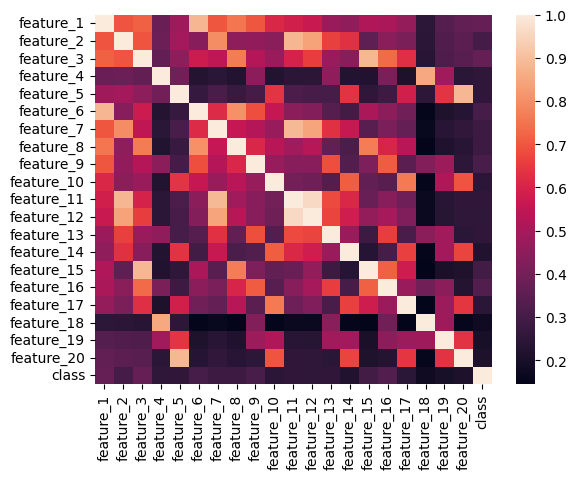

In [164]:
sns.heatmap(df.corr())